In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Monte Carlo Simulations

## Calculating Pi

In [2]:
def random_number_plusminus1(n):
    return 2*np.random.random(n) - 1

x, y = random_number_plusminus1((2,1000))

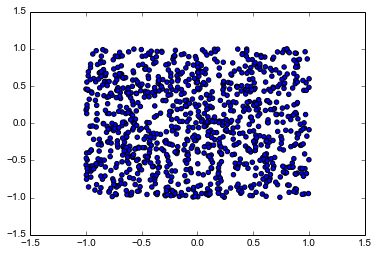

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
area_of_square = 2*2
ratio_of_dart_inside = np.mean(x**2 + y**2 < 1)
pi_estimate = area_of_square * ratio_of_dart_inside
print(pi_estimate, np.pi)

3.156 3.14159265359


In [5]:
x, y = random_number_plusminus1((2,10000000))
area_of_square = 2*2
ratio_of_dart_inside = np.mean(x**2 + y**2 < 1)
pi_estimate = area_of_square * ratio_of_dart_inside
print(pi_estimate, np.pi)

3.1426696 3.14159265359


## Calculating an integral

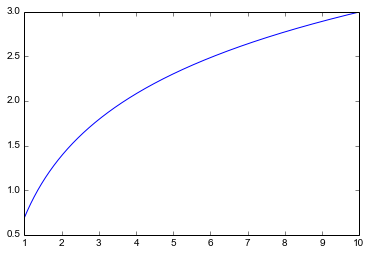

In [6]:
def f(x):
    return np.log(2*x) # Integral from 1 to 10 is 20.264
x = np.linspace(1,10,1000)
plt.plot(x, f(x))
plt.show()

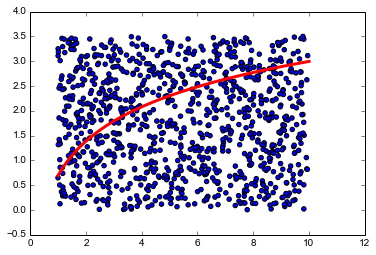

In [7]:
n = 1000
x_draw = 1 + 9*np.random.random(n)
y_draw = 3.5 * np.random.random(n)
plt.scatter(x_draw, y_draw)
plt.plot(x, f(x), 'r', lw=3)
plt.show()

In [8]:
area_square = 3.5*9
ratio_inside = np.mean(y_draw < f(x_draw))
integral = area_square * ratio_inside
print(integral)

19.719


In [9]:
def calc_intergal(n):
    x_draw = 1 + 9*np.random.random(n)
    y_draw = 3.5 * np.random.random(n)
    ratio_inside = np.mean(y_draw < f(x_draw))
    return area_square * ratio_inside

estimates = [calc_intergal(100000) for i in range(100)]
print(np.mean(estimates), '+-', np.std(estimates)/np.sqrt(100))

20.26510605 +- 0.00501253800948


## Drawing random numbers

Numpy has tons of random number functions.
See https://docs.scipy.org/doc/numpy/reference/routines.random.html
But it doesn't have everything.

It does have the exponential distributions, but let's try and make it ourselves.

In [10]:
def exponential_numbers(a, n):
    u = np.random.random(n)
    return -1/a * np.log(u) # inverse method

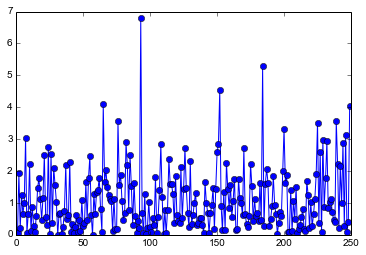

In [11]:
x = exponential_numbers(1, 250)
plt.plot(x, '-o')
plt.show()

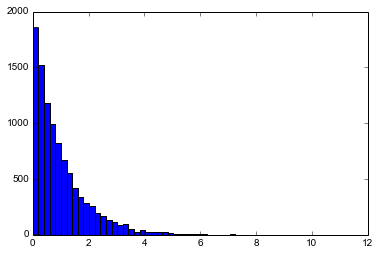

In [12]:
x = exponential_numbers(1, 10000)
plt.hist(x, bins=50)
plt.show()

## Hit-miss

Now let draw from a weird distrubtion:

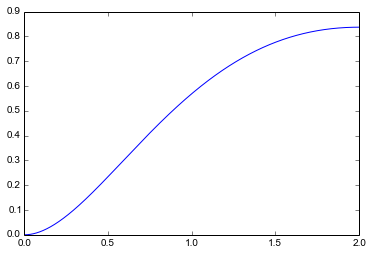

In [13]:
def f(x):
    return np.exp(-x) * x**2/(2-10*np.exp(-2))
x = np.linspace(0, 2, 10000)
plt.plot(x, f(x))
plt.show()

In [14]:
def draw_random_number(f, minx, maxx, maxy):
    while True:
        x = minx + (maxx - minx) * np.random.random()
        y = maxy * np.random.random()
        if f(x) > y:
            return x

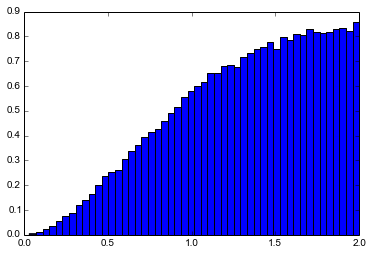

In [15]:
x = [draw_random_number(f, 0, 2, 1) for i in range(100000)]
plt.hist(x, bins=50, normed=True)
plt.show()

## Markov Chain Monte Carlo: Metropolis hastings
We give up the requirement that samples are independent.

In [16]:
def metropolis(f, x0, n=1000, std=0.3):
    current = f(x0)
    x = [x0]
    for i in range(1, n):
        xn = x0 + std * np.random.randn()
        new = f(xn)
        if np.random.random() < new/current:
            x0 = xn
            current = new
        x.append(x0)
    return x

In [17]:
gauss = lambda x : np.exp(-x**2/2)
exp = lambda x : np.exp(-x) * (x>=0)

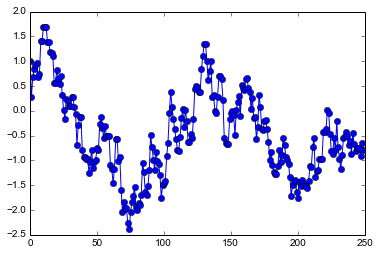

In [18]:
x = metropolis(gauss, 1, 250)
plt.plot(x, '-o')
plt.show()

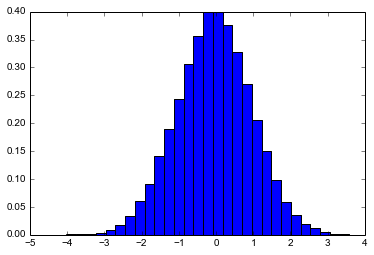

In [19]:
x = metropolis(gauss, 1, 100000)
plt.hist(x, bins=30, normed=True)
plt.show()

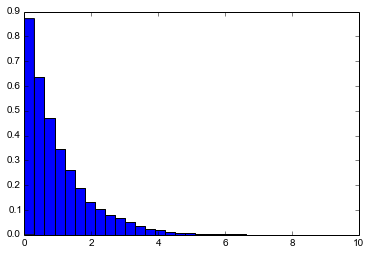

In [20]:
x = metropolis(exp, 1, 100000)
plt.hist(x, bins=30, normed=True)
plt.show()

## 2D MCMC Visualised

In [ ]:
def some_2d_distribution(x, y): # doesn't have to be normalised
    return x**2*np.exp(-y**2) * (x>=0) * (x<=10) * (y>=-5) * (y<=5)

X, Y = np.meshgrid(np.linspace(0,10,50), np.linspace(-5,5,50))
d = some_2d_distribution(X, Y)
plt.imshow(d, extent=(np.min(X),np.max(X),np.max(Y),np.min(Y)))
plt.show()

In [ ]:
def metropolis(f, x0, y0, n=1000, std=1.0):
    current = f(x0, y0)
    x = [x0]
    y = [y0]
    plt.ion()
    for i in range(1, n):
        xn = x0 + std * np.random.randn()
        yn = y0 + std * np.random.randn()
        new = f(xn, yn)
        if np.random.random() < new/current:
            x0 = xn
            y0 = yn
            current = new
        x.append(x0)
        y.append(y0)
        plt.clf()
        plt.plot(x, y)
        plt.axis([0,10,-5,5])
        plt.pause(0.001)
    return x

In [ ]:
%matplotlib
metropolis(some_2d_distribution, 0, 0)